In [2]:
# import the relevant packages
import pandas as pd

from sklearn import tree
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

## Preprocessing the data

### Training dataset

In [3]:
# load the dataset
train_data = pd.read_csv("Census_income_train.csv")

In [4]:
# inspect the dataset
train_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
len(train_data)

32560

In [6]:
# No null or NaN values
train_data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

#### Removing rows with unknown values ('?')

In [7]:
# All missing or unknow values, however, are marked with a question mark (?)
# There are 3 columns which contain '?' - Workclass, Occupation, Native-country

In [8]:
# Let's start with the Workclass column
# We can obtain a list of boolean values indicating whether there is a '?' on the current row
train_data["Workclass"].str.contains("\?")

<>:3: SyntaxWarning: invalid escape sequence '\?'
<>:3: SyntaxWarning: invalid escape sequence '\?'
/var/folders/jt/szp4qsfj2h7823c8c0ysns6h0000gp/T/ipykernel_8062/2666271752.py:3: SyntaxWarning: invalid escape sequence '\?'
  train_data["Workclass"].str.contains("\?")


0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Name: Workclass, Length: 32560, dtype: bool

In [9]:
# Let's reverse all the boolean values
train_data["Workclass"].str.contains("\?") == False

<>:2: SyntaxWarning: invalid escape sequence '\?'
<>:2: SyntaxWarning: invalid escape sequence '\?'
/var/folders/jt/szp4qsfj2h7823c8c0ysns6h0000gp/T/ipykernel_8062/2925928891.py:2: SyntaxWarning: invalid escape sequence '\?'
  train_data["Workclass"].str.contains("\?") == False


0        True
1        True
2        True
3        True
4        True
         ... 
32555    True
32556    True
32557    True
32558    True
32559    True
Name: Workclass, Length: 32560, dtype: bool

In [10]:
# Take the subset of the dataframe rows which don't contain '?'
clean_train_data = train_data[train_data["Workclass"].str.contains("\?") == False]

<>:2: SyntaxWarning: invalid escape sequence '\?'
<>:2: SyntaxWarning: invalid escape sequence '\?'
/var/folders/jt/szp4qsfj2h7823c8c0ysns6h0000gp/T/ipykernel_8062/1832287141.py:2: SyntaxWarning: invalid escape sequence '\?'
  clean_train_data = train_data[train_data["Workclass"].str.contains("\?") == False]


In [11]:
len(clean_train_data)

30724

In [12]:
# Let's do the same for 'Occupation'
clean_train_data = clean_train_data[clean_train_data["Occupation"].str.contains("\?") == False]

<>:2: SyntaxWarning: invalid escape sequence '\?'
<>:2: SyntaxWarning: invalid escape sequence '\?'
/var/folders/jt/szp4qsfj2h7823c8c0ysns6h0000gp/T/ipykernel_8062/566276695.py:2: SyntaxWarning: invalid escape sequence '\?'
  clean_train_data = clean_train_data[clean_train_data["Occupation"].str.contains("\?") == False]


In [13]:
len(clean_train_data)

30717

In [14]:
# And for 'Native-country'
clean_train_data = clean_train_data[clean_train_data["Native-country"].str.contains("\?") == False]

<>:2: SyntaxWarning: invalid escape sequence '\?'
<>:2: SyntaxWarning: invalid escape sequence '\?'
/var/folders/jt/szp4qsfj2h7823c8c0ysns6h0000gp/T/ipykernel_8062/3491538125.py:2: SyntaxWarning: invalid escape sequence '\?'
  clean_train_data = clean_train_data[clean_train_data["Native-country"].str.contains("\?") == False]


In [15]:
len(clean_train_data)

30161

In [16]:
# Finally, let's reset the index
clean_train_data = clean_train_data.reset_index(drop=True)

#### Creating dummy variables and separating inputs and targets

In [17]:
# In the original data, there are both categorical and numerical data
# Decision trees and random forest can work with categorical data in general
# However, this is not implemented in sklearn
# So, we need to convert the categorical data to numerical
# We will do that with one hot encoding

In [18]:
# Pandas can automatically do that for us with '.get_dummies'
train_dummies = pd.get_dummies(clean_train_data, drop_first=False)

In [19]:
train_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K,Income_ >50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,38,215646,9,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
3,53,234721,7,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4,28,338409,13,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [20]:
# The last 2 columns are whether the income <= 50k and whether it is >50k
# Both of these carry the same information, so we will remove one of them
train_dummies = train_dummies.drop(['Income_ <=50K'],axis=1)

In [21]:
train_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ >50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# The input features are everything besides the last column
train_input = train_dummies.iloc[:,:-1]

# The target/output is just the last column
train_target = train_dummies.iloc[:,-1]

In [23]:
train_input.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
train_target.head()

0    False
1    False
2    False
3    False
4    False
Name: Income_ >50K, dtype: bool

### Test dataset

In [25]:
# Let's do the same preprocessing on the test dataset

In [26]:
# Load test data
test_data = pd.read_csv("Census_income_test.csv")

In [27]:
test_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [28]:
len(test_data)

16281

#### Cleaning unknown ('?') values

In [29]:
clean_test_data = test_data[test_data["Workclass"].str.contains("\?") == False]

<>:1: SyntaxWarning: invalid escape sequence '\?'
<>:1: SyntaxWarning: invalid escape sequence '\?'
/var/folders/jt/szp4qsfj2h7823c8c0ysns6h0000gp/T/ipykernel_8062/4123045775.py:1: SyntaxWarning: invalid escape sequence '\?'
  clean_test_data = test_data[test_data["Workclass"].str.contains("\?") == False]


In [30]:
len(clean_test_data)

15318

In [31]:
clean_test_data = clean_test_data[clean_test_data["Occupation"].str.contains("\?") == False]

<>:1: SyntaxWarning: invalid escape sequence '\?'
<>:1: SyntaxWarning: invalid escape sequence '\?'
/var/folders/jt/szp4qsfj2h7823c8c0ysns6h0000gp/T/ipykernel_8062/3319064104.py:1: SyntaxWarning: invalid escape sequence '\?'
  clean_test_data = clean_test_data[clean_test_data["Occupation"].str.contains("\?") == False]


In [32]:
len(clean_test_data)

15315

In [33]:
clean_test_data = clean_test_data[clean_test_data["Native-country"].str.contains("\?") == False]

<>:1: SyntaxWarning: invalid escape sequence '\?'
<>:1: SyntaxWarning: invalid escape sequence '\?'
/var/folders/jt/szp4qsfj2h7823c8c0ysns6h0000gp/T/ipykernel_8062/2085904647.py:1: SyntaxWarning: invalid escape sequence '\?'
  clean_test_data = clean_test_data[clean_test_data["Native-country"].str.contains("\?") == False]


In [34]:
len(clean_test_data)

15060

In [35]:
clean_test_data = clean_test_data.reset_index(drop=True)

#### Creating dummy variables and sepratting inputs and targets

In [36]:
test_dummies = pd.get_dummies(clean_test_data, drop_first=False)

In [37]:
test_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K.,Income_ >50K.
0,25,226802,7,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
1,38,89814,9,0,0,50,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,28,336951,12,0,0,40,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
3,44,160323,10,7688,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
4,34,198693,6,0,0,30,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False


In [38]:
test_dummies = test_dummies.drop(['Income_ <=50K.'],axis=1)

In [39]:
test_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ >50K.
0,25,226802,7,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1,38,89814,9,0,0,50,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,28,336951,12,0,0,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,44,160323,10,7688,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
4,34,198693,6,0,0,30,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [40]:
test_input = test_dummies.iloc[:,:-1]
test_target = test_dummies.iloc[:,-1]

In [41]:
test_target.head()

0    False
1    False
2     True
3     True
4    False
Name: Income_ >50K., dtype: bool

## Creating and visualizing the tree

In [42]:
# Define the model as a decision tree classifier
clf = tree.DecisionTreeClassifier()

In [43]:
# Train the model
clf.fit(train_input,train_target)

DecisionTreeClassifier()

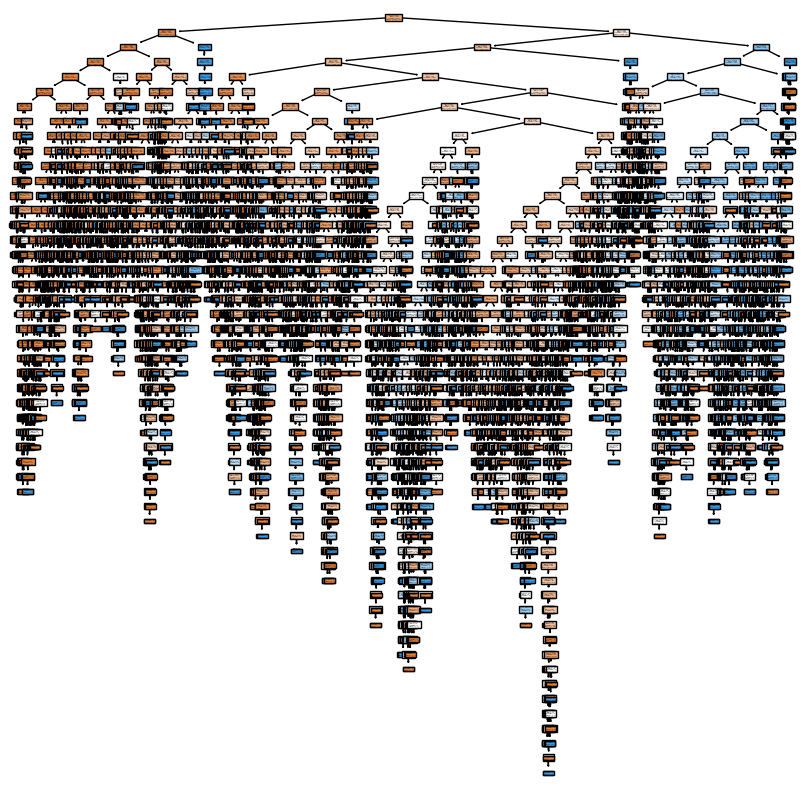

In [44]:
# Plot the tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf, filled=True)
plt.show()

# NOTE: It may take a lot of time (~3 min) untill the whole tree is drawn

In [45]:
# This picture is very complicated indicating a tree with enormous proportions
# This indicates a high probability that the model has overfitted

## Testing the model

In [46]:
# get the predictions based on the test inputs
test_pred = clf.predict(test_input)

In [47]:
# print the metrics obtained from the real targets and our model's predictions
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

       False       0.87      0.86      0.87     11360
        True       0.60      0.62      0.61      3700

    accuracy                           0.80     15060
   macro avg       0.73      0.74      0.74     15060
weighted avg       0.81      0.80      0.80     15060



## Create the tree with pruning

In [48]:
# Define the model as a decision tree classifier with pruning in order to avoid overfitting
# The value of 0.001 for the pruning seems like a good spot for this particular model
clf = tree.DecisionTreeClassifier(ccp_alpha=0.001)

In [49]:
# Train the tree
clf.fit(train_input,train_target)

DecisionTreeClassifier(ccp_alpha=0.001)

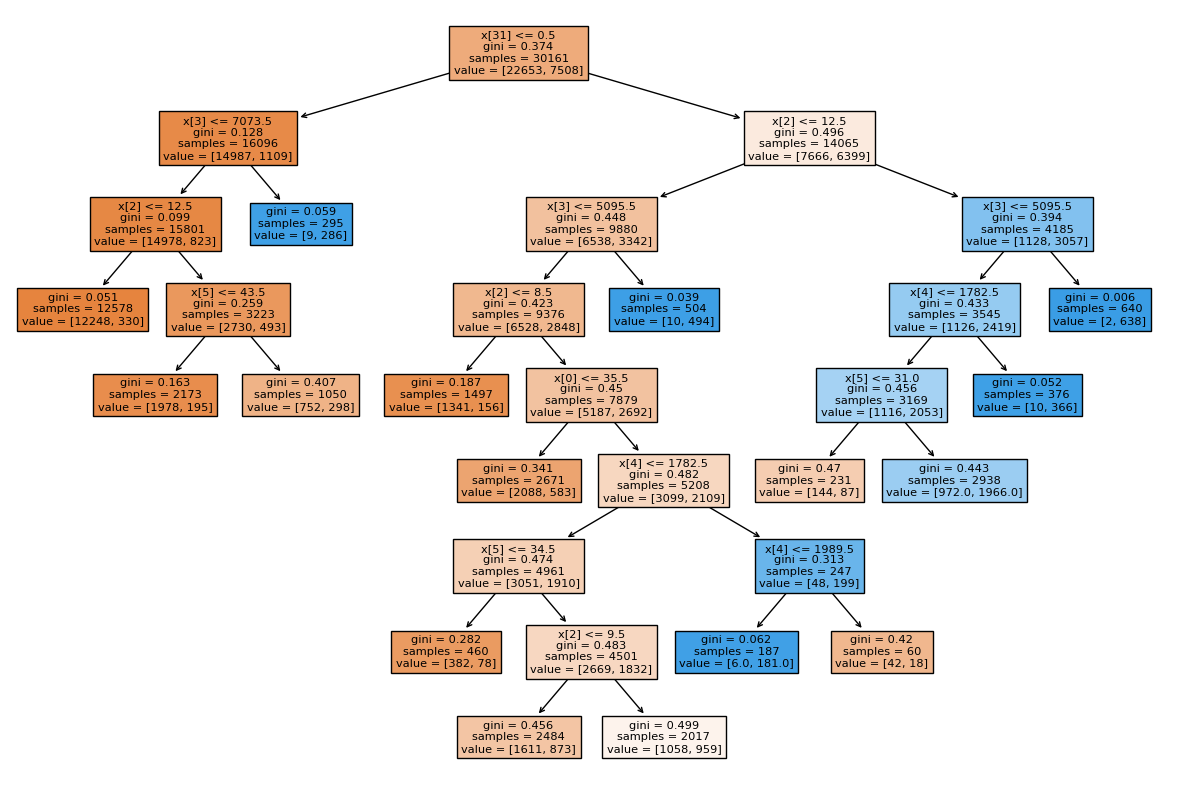

In [50]:
# Plot the tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True)
plt.show()

In [51]:
# This time th tree looks much more managable

## Testing the model

In [52]:
# get the predictions based on the test inputs
test_pred = clf.predict(test_input)

In [53]:
# print the metrics obtained from the real targets and our model's predictions
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

       False       0.86      0.96      0.90     11360
        True       0.79      0.51      0.62      3700

    accuracy                           0.85     15060
   macro avg       0.82      0.73      0.76     15060
weighted avg       0.84      0.85      0.83     15060



In [54]:
# The accuracy jumped from 80% to 85% after pruning
# This confirms our suspicions that the first tree has overfitted